# importer les librairies

In [1]:
import pandas as pd
import chardet
from pandas_profiling import ProfileReport
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')

import src

# trouver le bon encoding pour lire les fichiers et les ouvrir avec

In [2]:
file_pattern = "../Base_OP_*_Nationale.csv"
combined_df = src.load_and_concatenate_csv_files(file_pattern)

In [3]:
combined_df.head()

,Observatory,Data_year,agglomeration,Zone_complementaire,Type_habitat,epoque_construction_homogene,anciennete_locataire_homogene,nombre_pieces_homogene,loyer_1_decile,loyer_1_quartile,...,loyer_mensuel_1_quartile,loyer_mensuel_median,loyer_mensuel_3_quartile,loyer_mensuel_9_decile,moyenne_loyer_mensuel,surface_moyenne,nombre_obsservations,nombre_logements,methodologie_production,nombre_observations
0,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,NaN,"9,9","11,3",...,537.0,679.0,838.0,1030.0,718.0,55.0,22238.0,NaN,Estimation directe,NaN
1,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 1-3P,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Ensemble 4P et plus,8,"9,9",...,814.0,1019.0,1262.0,1500.0,1082.0,95.0,2624.0,NaN,Estimation directe,NaN
3,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 4P et plus,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Appart 1P,"12,4","14,7",...,416.0,480.0,557.0,650.0,493.0,29.0,5226.0,NaN,Estimation directe,NaN


In [4]:
combined_df

,Observatory,Data_year,agglomeration,Zone_complementaire,Type_habitat,epoque_construction_homogene,anciennete_locataire_homogene,nombre_pieces_homogene,loyer_1_decile,loyer_1_quartile,...,loyer_mensuel_1_quartile,loyer_mensuel_median,loyer_mensuel_3_quartile,loyer_mensuel_9_decile,moyenne_loyer_mensuel,surface_moyenne,nombre_obsservations,nombre_logements,methodologie_production,nombre_observations
0,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,NaN,"9,9","11,3",...,537.0,679.0,838.0,1030.0,718.0,55.0,22238.0,NaN,Estimation directe,NaN
1,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 1-3P,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Ensemble 4P et plus,8,"9,9",...,814.0,1019.0,1262.0,1500.0,1082.0,95.0,2624.0,NaN,Estimation directe,NaN
3,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 4P et plus,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Appart 1P,"12,4","14,7",...,416.0,480.0,557.0,650.0,493.0,29.0,5226.0,NaN,Estimation directe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78323,B8300,2022,Communes non TLV,NaN,Appartement,5. Après 2005,NaN,Appart 2P,"10,6","11,9",...,495.0,539.0,600.0,645.0,546.0,42.0,NaN,781.0,Estimation directe,201.0
78324,B8300,2022,Communes non TLV,NaN,Appartement,5. Après 2005,NaN,Appart 3P,"9,3","9,5",...,600.0,650.0,735.0,900.0,683.0,63.0,NaN,807.0,Estimation directe,157.0
78325,B8300,2022,Communes non TLV,NaN,Appartement,5. Après 2005,NaN,Appart 4P+,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estimation directe,29.0
78326,B8300,2022,Communes non TLV,NaN,Appartement,5. Après 2005,1. Moins de 1 an,NaN,"9,1","10,7",...,514.0,623.0,760.0,1050.0,671.0,57.0,NaN,NaN,Estimation directe,149.0


# nettoyer les données du dataframe

In [5]:
combined_df = src.combine_nombre_observations_columns(combined_df)

In [6]:
df = combined_df

In [7]:
df = combined_df
df = src.clean_and_filter_columns(df)

In [8]:
#ProfileReport(df) 

# etudier les valeurs

In [9]:
df.head()

,Observatory,Data_year,agglomeration,Zone_complementaire,Type_habitat,epoque_construction_homogene,anciennete_locataire_homogene,nombre_pieces_homogene,loyer_1_decile,loyer_1_quartile,...,loyer_mensuel_1_decile,loyer_mensuel_1_quartile,loyer_mensuel_median,loyer_mensuel_3_quartile,loyer_mensuel_9_decile,moyenne_loyer_mensuel,surface_moyenne,nombre_logements,methodologie_production,nombre_observations
0,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,NaN,"9,9","11,3",...,438.0,537.0,679.0,838.0,1030.0,718.0,55.0,NaN,Estimation directe,22238.0
1,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 1-3P,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Ensemble 4P et plus,8,"9,9",...,696.0,814.0,1019.0,1262.0,1500.0,1082.0,95.0,NaN,Estimation directe,2624.0
3,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 4P et plus,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Appart 1P,"12,4","14,7",...,348.0,416.0,480.0,557.0,650.0,493.0,29.0,NaN,Estimation directe,5226.0


In [10]:
df["agglomeration"].unique()

array(['Agglomération de Nice-Menton', "Agglomération d'Aix-Marseille",
       "Agglomération d'Arles", 'Agglomération de Besançon',
       'Agglomération de Toulouse', 'Agglomération de Montpellier',
       'Agglomération de Sète', 'Agglomération de Rennes',
       'Sud Loire - proche Haute-Loire', 'Agglomération de Nantes',
       'Agglomération de Lille', "Agglomération d'Alençon",
       "Unité urbaine de l'agglomération de Bayonne",
       'Agglomération de Lyon', 'Agglomération parisienne',
       'Agglomération parisienne (hors Paris)', 'Paris intra-muros',
       'Agglomération de Toulon', 'Agglomération de Draguignan',
       'Agglomération de Fréjus',
       'Agglomération de Saint Denis (La Réunion)',
       'Agglomération de La Rochelle', 'Agglomération de Bordeaux',
       'Agglomération de Teste-de-Buch-Arcachon',
       'Eurométropole de Strasbourg', 'Agglomération de Marseille',
       'Agglomération de Montbéliard', 'Agglomération de Brest',
       'Agglomération de Nî

In [11]:
total_missing_values = df.isna().sum().sum()
print("Nombre total de valeurs manquantes dans le DataFrame :", total_missing_values)

Nombre total de valeurs manquantes dans le DataFrame : 510583


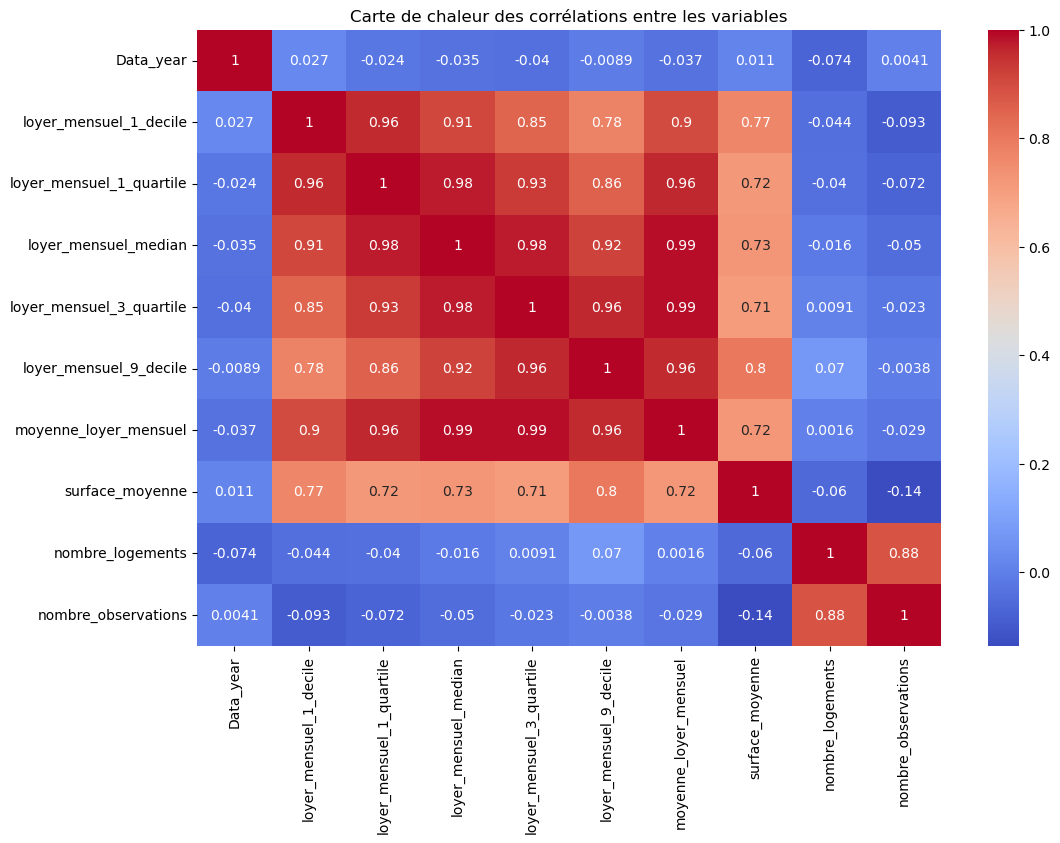

In [12]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Visualiser la matrice de corrélation à l'aide d'une carte de chaleur
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Carte de chaleur des corrélations entre les variables")
plt.show()

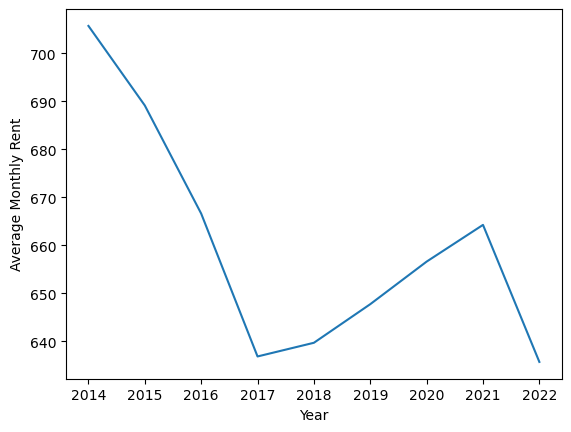

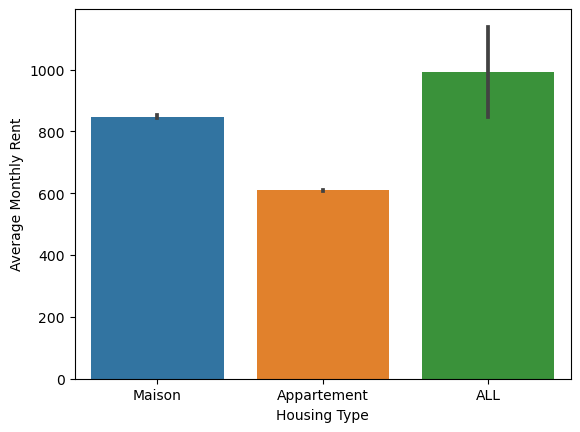

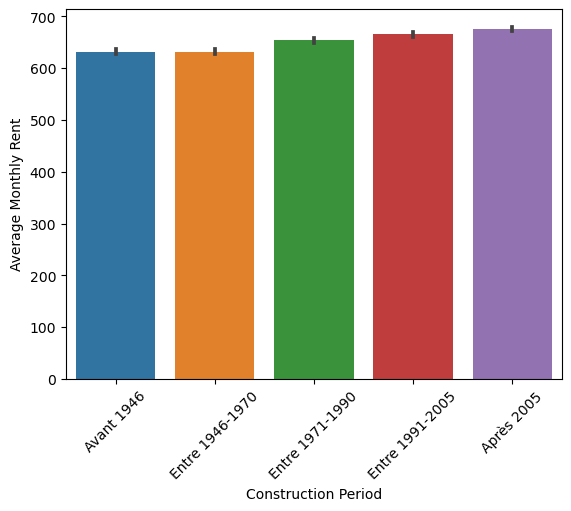

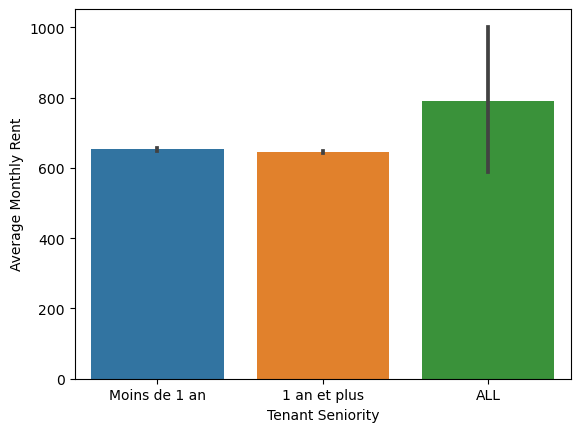

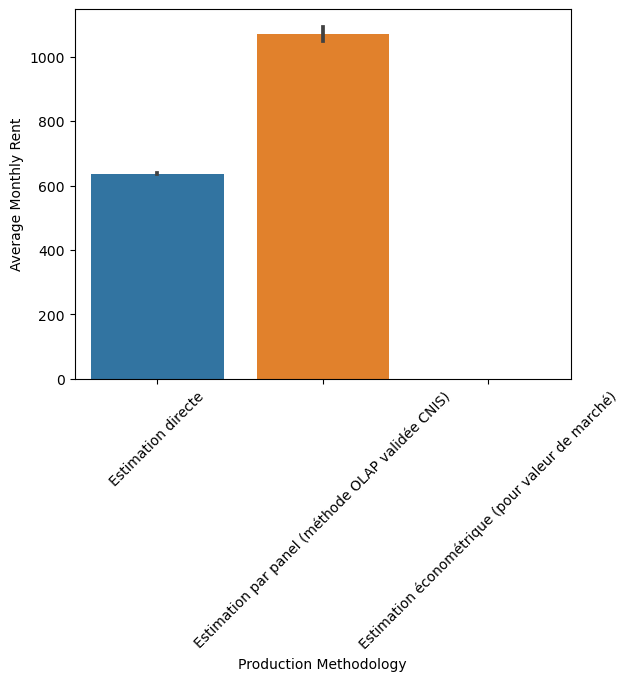

In [13]:
# 1. Évolution du loyer moyen sur la période étudiée
df_grouped_year = df.groupby('Data_year')['moyenne_loyer_mensuel'].mean().reset_index()
plt.plot(df_grouped_year['Data_year'], df_grouped_year['moyenne_loyer_mensuel'])
plt.xlabel('Year')
plt.ylabel('Average Monthly Rent')
plt.show()

# 2. Comparaison des loyers moyens par type d'habitat
sns.barplot(data=df, x='Type_habitat', y='moyenne_loyer_mensuel')
plt.xlabel('Housing Type')
plt.ylabel('Average Monthly Rent')
plt.show()

# 3. Loyer moyen par époque de construction
sns.barplot(data=df, x='epoque_construction_homogene', y='moyenne_loyer_mensuel')
plt.xlabel('Construction Period')
plt.ylabel('Average Monthly Rent')
plt.xticks(rotation=45)
plt.show()

# 4. Loyer moyen par ancienneté du locataire
sns.barplot(data=df, x='anciennete_locataire_homogene', y='moyenne_loyer_mensuel')
plt.xlabel('Tenant Seniority')
plt.ylabel('Average Monthly Rent')
plt.show()


# 5. Loyer moyen par méthodologie de production
sns.barplot(data=df, x='methodologie_production', y='moyenne_loyer_mensuel')
plt.xlabel('Production Methodology')
plt.ylabel('Average Monthly Rent')
plt.xticks(rotation=45)
plt.show()


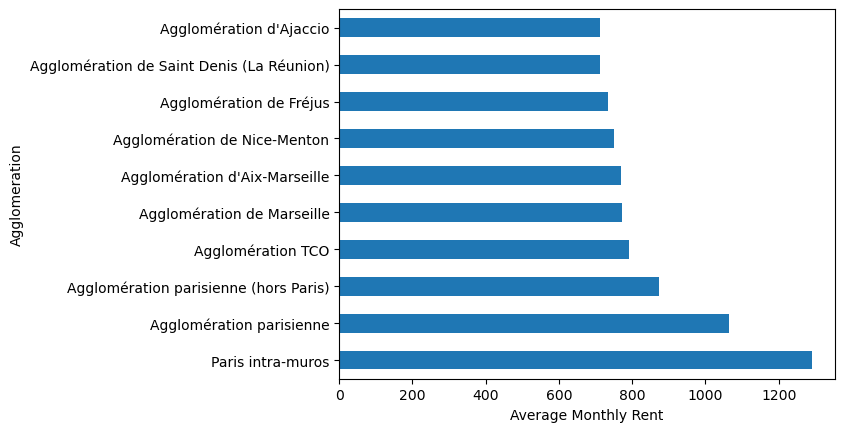

In [14]:
#Loyer moyen par agglomération (Top 10):
top_agglo = df.groupby('agglomeration')['moyenne_loyer_mensuel'].mean().sort_values(ascending=False).head(10)
top_agglo.plot(kind='barh')
plt.xlabel('Average Monthly Rent')
plt.ylabel('Agglomeration')
plt.show()


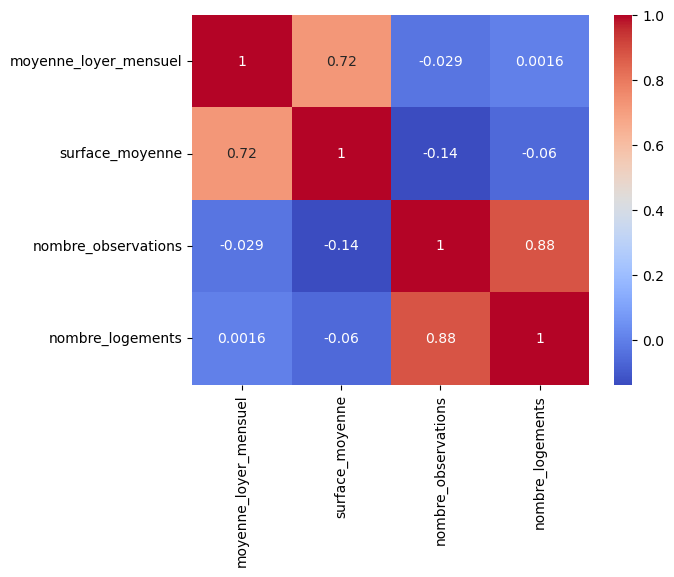

In [15]:
#Heatmap de corrélation entre les variables numériques:
numerical_columns = ['loyer_1_decile', 'loyer_1_quartile', 'loyer_median', 'loyer_3_quartile', 'loyer_9_decile', 'moyenne_loyer_mensuel', 'surface_moyenne', 'nombre_observations', 'nombre_logements']
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


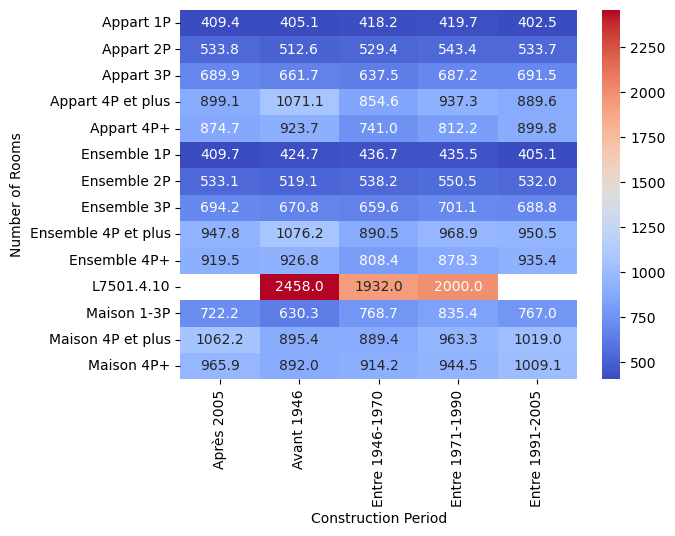

In [16]:
#Loyer moyen par époque de construction et nombre de pièces:
pivot_table = df.pivot_table(values='moyenne_loyer_mensuel', index='nombre_pieces_homogene', columns='epoque_construction_homogene', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='coolwarm')
plt.xlabel('Construction Period')
plt.ylabel('Number of Rooms')
plt.show()


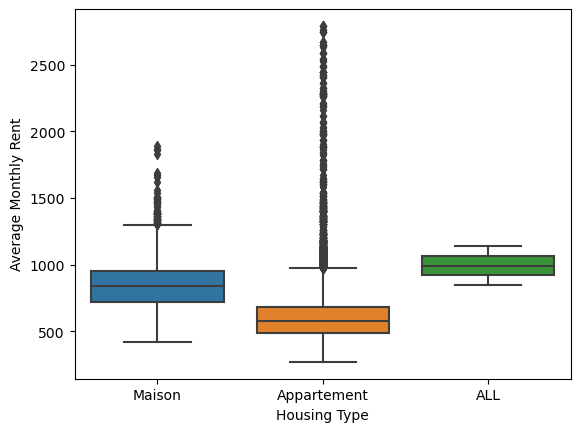

In [17]:
#Distribution des loyers moyens par type d'habitat:
sns.boxplot(data=df, x='Type_habitat', y='moyenne_loyer_mensuel')
plt.xlabel('Housing Type')
plt.ylabel('Average Monthly Rent')
plt.show()


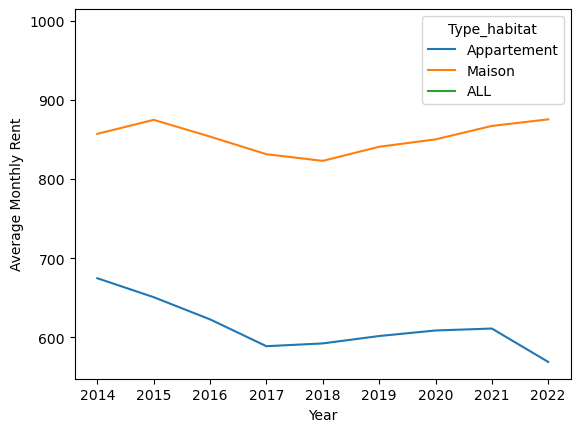

In [18]:
#Évolution du loyer moyen par type d'habitat au fil des ans:
df_grouped_year_type = df.groupby(['Data_year', 'Type_habitat'])['moyenne_loyer_mensuel'].mean().reset_index()
sns.lineplot(data=df_grouped_year_type, x='Data_year', y='moyenne_loyer_mensuel', hue='Type_habitat')
plt.xlabel('Year')
plt.ylabel('Average Monthly Rent')
plt.show()


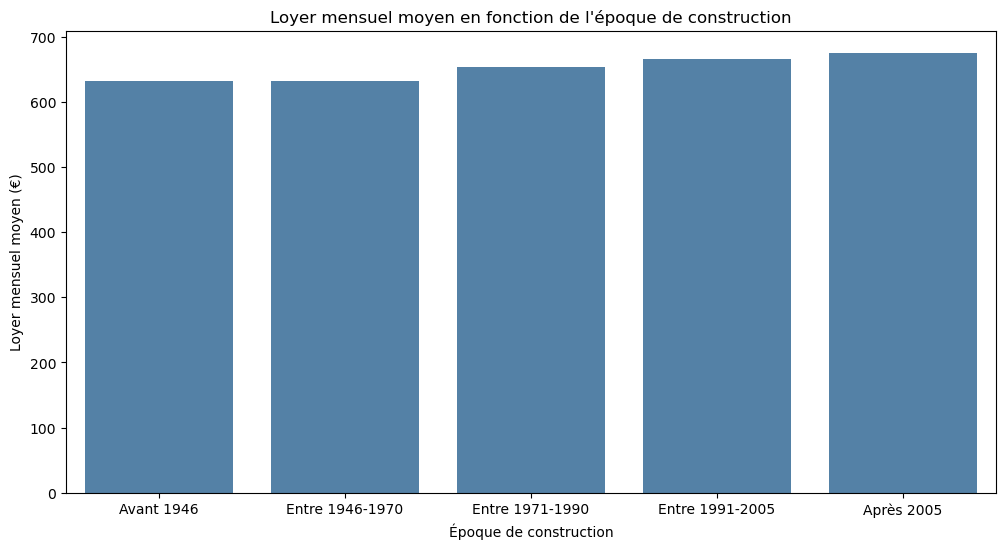

In [19]:
# On crée une copie du dataframe pour ne pas modifier l'original
df_copy = df.copy()

# Utilisez la fonction clean_and_remove_other_values pour nettoyer la colonne 'epoque_construction_homogene'
valid_values = ['Avant 1946', 'Entre 1946-1970', 'Entre 1971-1990', 'Entre 1991-2005', 'Après 2005']
df_copy = src.clean_and_remove_other_values(df_copy, 'epoque_construction_homogene', valid_values)

# On crée un graphique à barres montrant le loyer mensuel moyen en fonction de l'époque de construction
plt.figure(figsize=(12, 6))
sns.barplot(data=df_copy, x='epoque_construction_homogene', y='moyenne_loyer_mensuel', ci=None, color='steelblue')
plt.title('Loyer mensuel moyen en fonction de l\'époque de construction')
plt.ylabel('Loyer mensuel moyen (€)')
plt.xlabel('Époque de construction')
plt.show()


In [20]:
df["nombre_pieces_homogene"].value_counts()

Appart 2P              5919
Appart 3P              5917
Appart 1P              5880
Maison 1-3P            5411
Appart 4P+             4543
Ensemble 3P            4369
Ensemble 2P            4367
Ensemble 1P            4356
Maison 4P+             4354
Ensemble 4P+           3237
Appart 4P et plus      1365
Maison 4P et plus      1189
Ensemble 4P et plus    1081
L7501.4.10               14
Maison                    2
Name: nombre_pieces_homogene, dtype: int64

In [21]:
import re

df["nombre_pieces_homogene"] = df["nombre_pieces_homogene"].replace(r' et plus', '+', regex=True)


C:\Users\alex6\AppData\Local\Temp\ipykernel_26472\261951660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nombre_pieces_homogene"] = df["nombre_pieces_homogene"].replace(r' et plus', '+', regex=True)


In [22]:
df["nombre_pieces_homogene"].value_counts()

Appart 2P       5919
Appart 3P       5917
Appart 4P+      5908
Appart 1P       5880
Maison 4P+      5543
Maison 1-3P     5411
Ensemble 3P     4369
Ensemble 2P     4367
Ensemble 1P     4356
Ensemble 4P+    4318
L7501.4.10        14
Maison             2
Name: nombre_pieces_homogene, dtype: int64

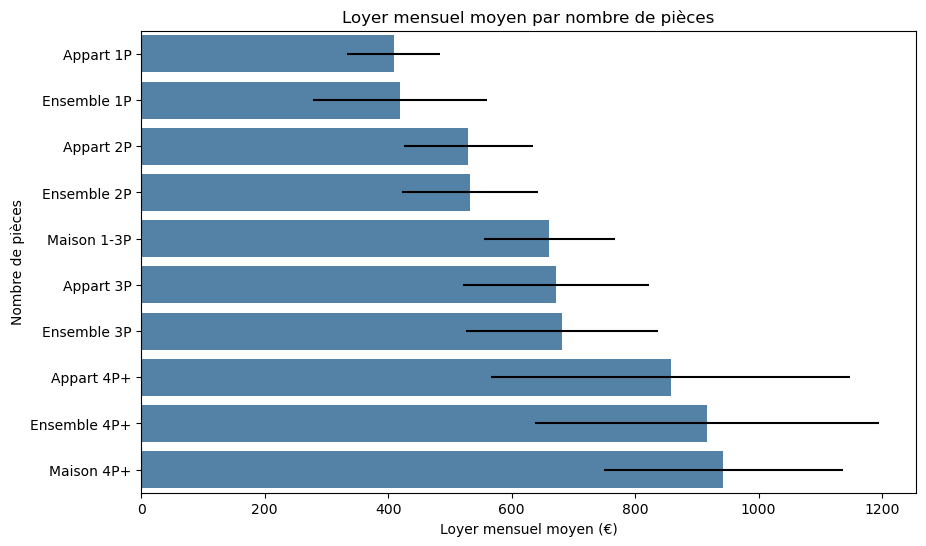

In [23]:
grouped = src.process_grouped_data(df, 'L7501.4.10', 'nombre_pieces_homogene', 'moyenne_loyer_mensuel')

plt.figure(figsize=(10, 6))
sns.barplot(y='nombre_pieces_homogene', x='moyenne_loyer_mensuel_mean', data=grouped, color='steelblue', xerr=grouped['moyenne_loyer_mensuel_std'], capsize=0.1)
plt.ylabel("Nombre de pièces")
plt.xlabel("Loyer mensuel moyen (€)")
plt.title("Loyer mensuel moyen par nombre de pièces")
plt.show()
